# Create Graphics

In [77]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

BOOK_COUNT_CLEANED_DF = Path('./data/book_counts_cleaned.csv')

In [78]:
book_ranking = pd.read_csv(BOOK_COUNT_CLEANED_DF, index_col=0)

## Ranking by Posts and Comments

In [79]:
# Absolute ranking:
absolute_rank = pd.DataFrame(book_ranking.groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)
absolute_rank = pd.DataFrame(absolute_rank[['Occurrences']].reset_index())
absolute_rank

C:\Users\timwi\AppData\Local\Temp\ipykernel_14628\130709116.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  absolute_rank = pd.DataFrame(book_ranking.groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)


,Title,Normalized Title,Occurrences
0,Dune,dune,2303
1,1984,1984,2228
2,The Hunger Games,hungergames,1173
3,Infinite jest,infinitejest,1045
4,The Hobbit,hobbit,992
...,...,...,...
21330,Silent Kill,silentkill,1
21331,Silence fallen,silencefallen,1
21332,Signs of love,signsoflove,1
21333,Signore Degli Anelli,signoredeglianelli,1


In [80]:
def remove_synonyms(rank_df):
    synonyms = {('darktower', 'darktowers'), ('50shadesofgrey', 'fiftyshadesofgrey')}

    for syn1, syn2 in synonyms:
        count1 = rank_df.loc[rank_df['Normalized Title'] == syn1].values[0][2]
        count2 = rank_df.loc[rank_df['Normalized Title'] == syn2].values[0][2]
        title = rank_df.loc[rank_df['Normalized Title'] == syn1].values[0][0]
        new_col = pd.DataFrame([[title, syn1, count1+count2]], columns=['Title', 'Normalized Title', 'Occurrences'])

        rank_df = rank_df.drop(rank_df[rank_df['Normalized Title'] == syn1].index)
        rank_df = rank_df.drop(rank_df[rank_df['Normalized Title'] == syn2].index)

        rank_df = pd.concat([rank_df, new_col])

        rank_df.sort_values('Occurrences', ascending=False)

        rank_df = rank_df.sort_values('Occurrences', ascending=False)
        rank_df = rank_df.reset_index(drop=True)
    return rank_df[:100]

In [81]:
def plot_ranking(ranking, title, y_axis="Occurrences in Posts and Comments"):
    plt.rcParams["figure.dpi"] = 200
    plt.rcParams["figure.figsize"] = (5,5)

    p = ranking.sort_values(by='Occurrences').plot(kind='barh', x='Title', zorder=2)
    plt.suptitle(title, x=0.33, y=0.93, weight='bold')
    p.set_xlim(0, 2400)
    p.set_xlabel(y_axis, labelpad=10, size=8, fontstyle='italic')
    p.set_ylabel(None)

    vals = p.get_xticks()
    p.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
    for tick in vals:
        p.axvline(x=tick, alpha=1, color='#eeeeee', zorder=1)

    p.tick_params(axis='y', which='both', bottom=False, top=False, left=False, labelbottom=False)

    p.spines['right'].set_visible(False)
    p.spines['top'].set_visible(False)
    p.spines['left'].set_visible(False)
    p.spines['bottom'].set_visible(False)
    p.get_legend().remove()

In [82]:
post_and_comments_ranked = remove_synonyms(absolute_rank)
post_and_comments_ranked.to_csv('./data/Top-100.csv')
post_and_comments_ranked

,Title,Normalized Title,Occurrences
0,Dune,dune,2303
1,1984,1984,2228
2,The Hunger Games,hungergames,1173
3,The dark tower,darktower,1064
4,Infinite jest,infinitejest,1045
...,...,...,...
95,The haunting of Hill House,hauntingofhillhouse,186
96,For Whom the Bell Tolls,forwhomthebelltolls,186
97,Finnegans wake,finneganswake,186
98,The Pillars of the Earth,pillarsoftheearth,184


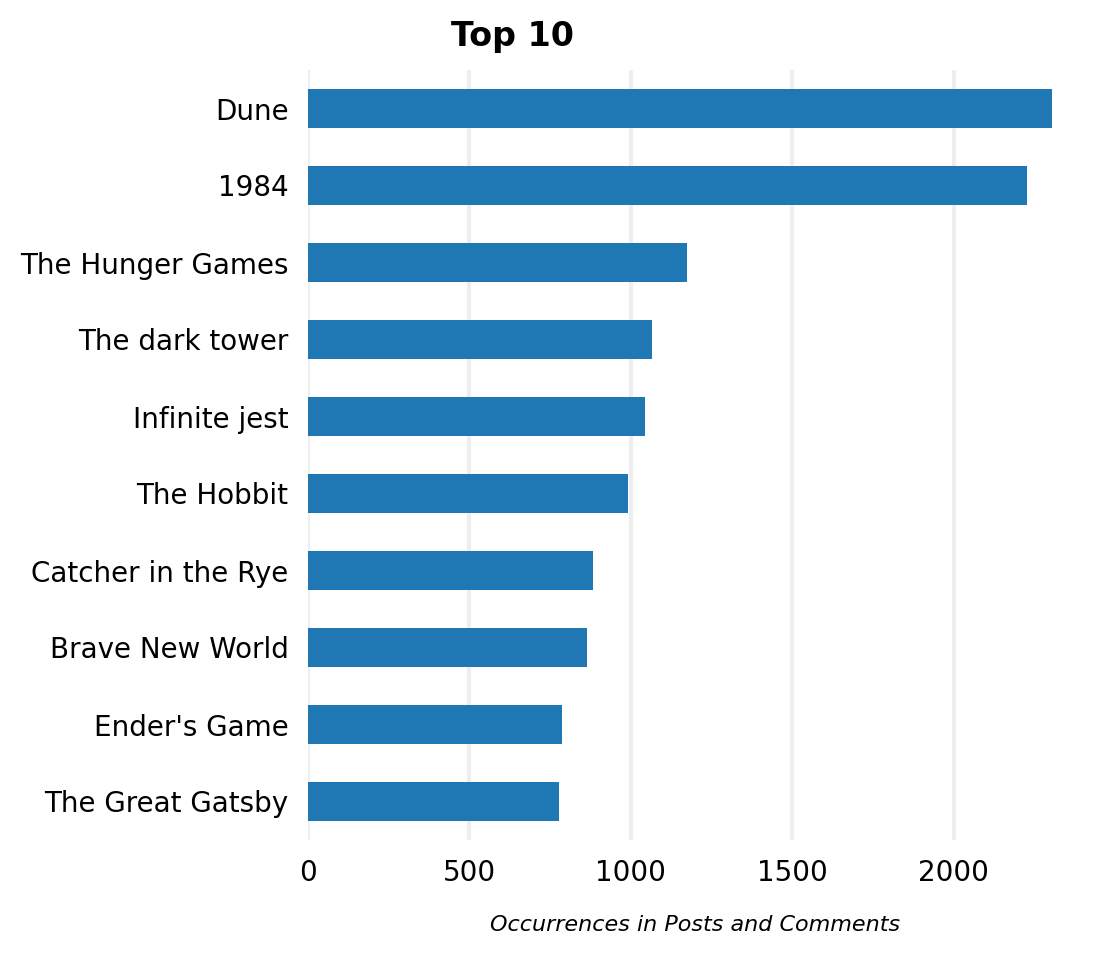

In [83]:
plot_ranking(post_and_comments_ranked[:10], 'Top 10')
plt.savefig('./Graphics/Top-10.png', bbox_inches='tight')

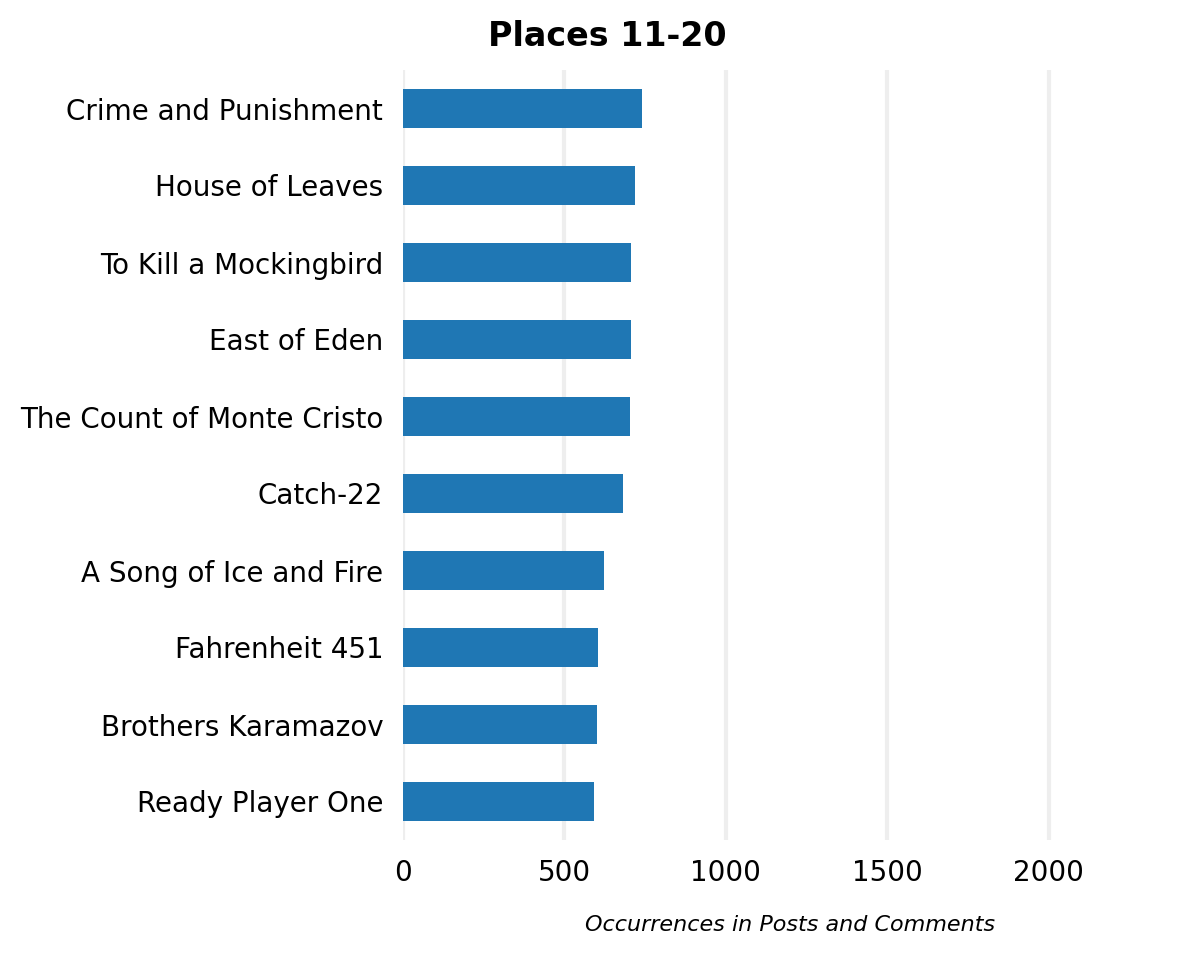

In [84]:
plot_ranking(post_and_comments_ranked[10:20], 'Places 11-20')
plt.savefig('./Graphics/Top11-20.png', bbox_inches='tight')

## Rank by Post Texts

In [85]:
post_rank = pd.DataFrame(book_ranking[book_ranking['Post or Comment'] == 'post'].groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)
post_rank = pd.DataFrame(post_rank[['Occurrences']].reset_index())
post_rank

C:\Users\timwi\AppData\Local\Temp\ipykernel_14628\3565420198.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  post_rank = pd.DataFrame(book_ranking[book_ranking['Post or Comment'] == 'post'].groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)


,Title,Normalized Title,Occurrences
0,Dune,dune,2104
1,1984,1984,2080
2,The Hunger Games,hungergames,1136
3,Infinite jest,infinitejest,1028
4,The Hobbit,hobbit,907
...,...,...,...
21330,The Coldest Winter Ever,coldestwinterever,1
21331,The Coldest Winter,coldestwinter,1
21332,Lords of finance,lordsoffinance,1
21333,The Cold One,coldone,1


In [86]:
post_rank = remove_synonyms(post_rank)

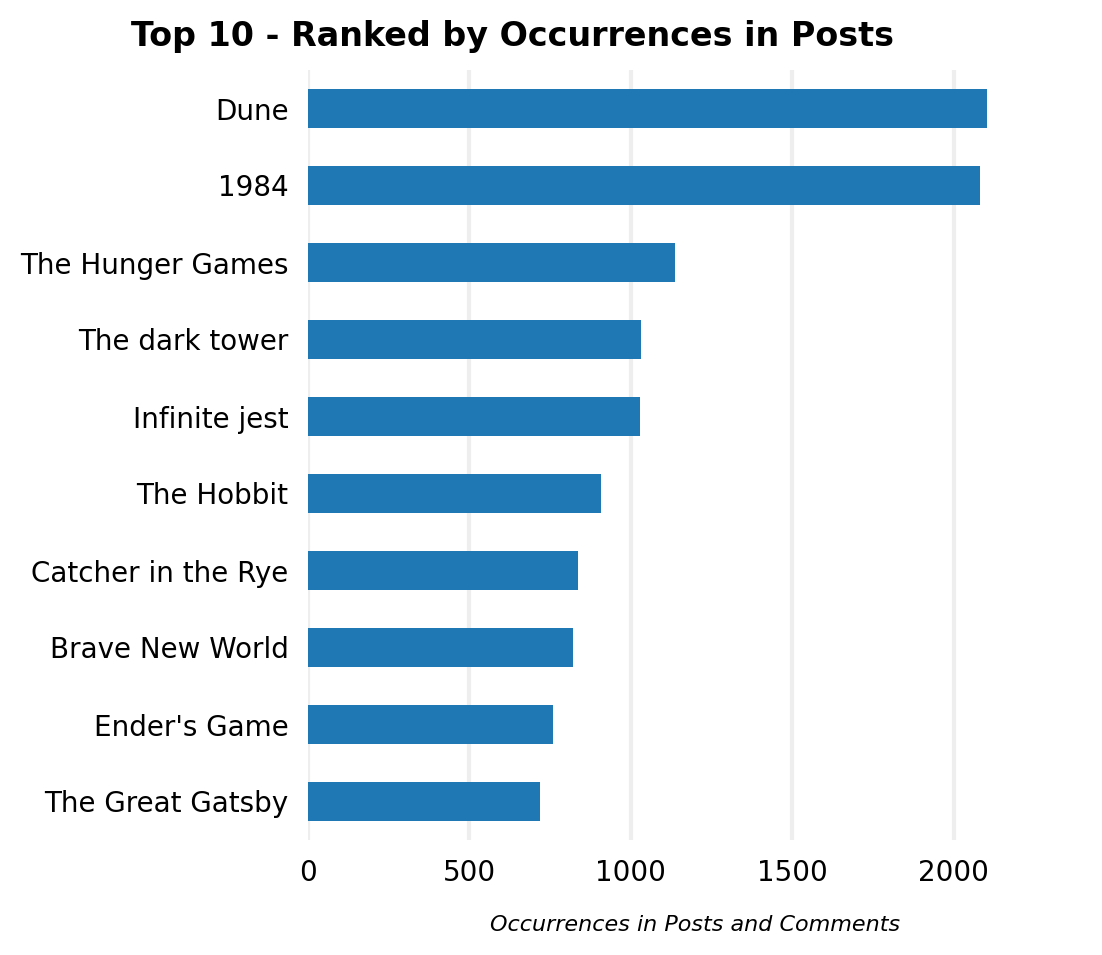

In [87]:
plot_ranking(post_rank[:10], 'Top 10 - Ranked by Occurrences in Posts')

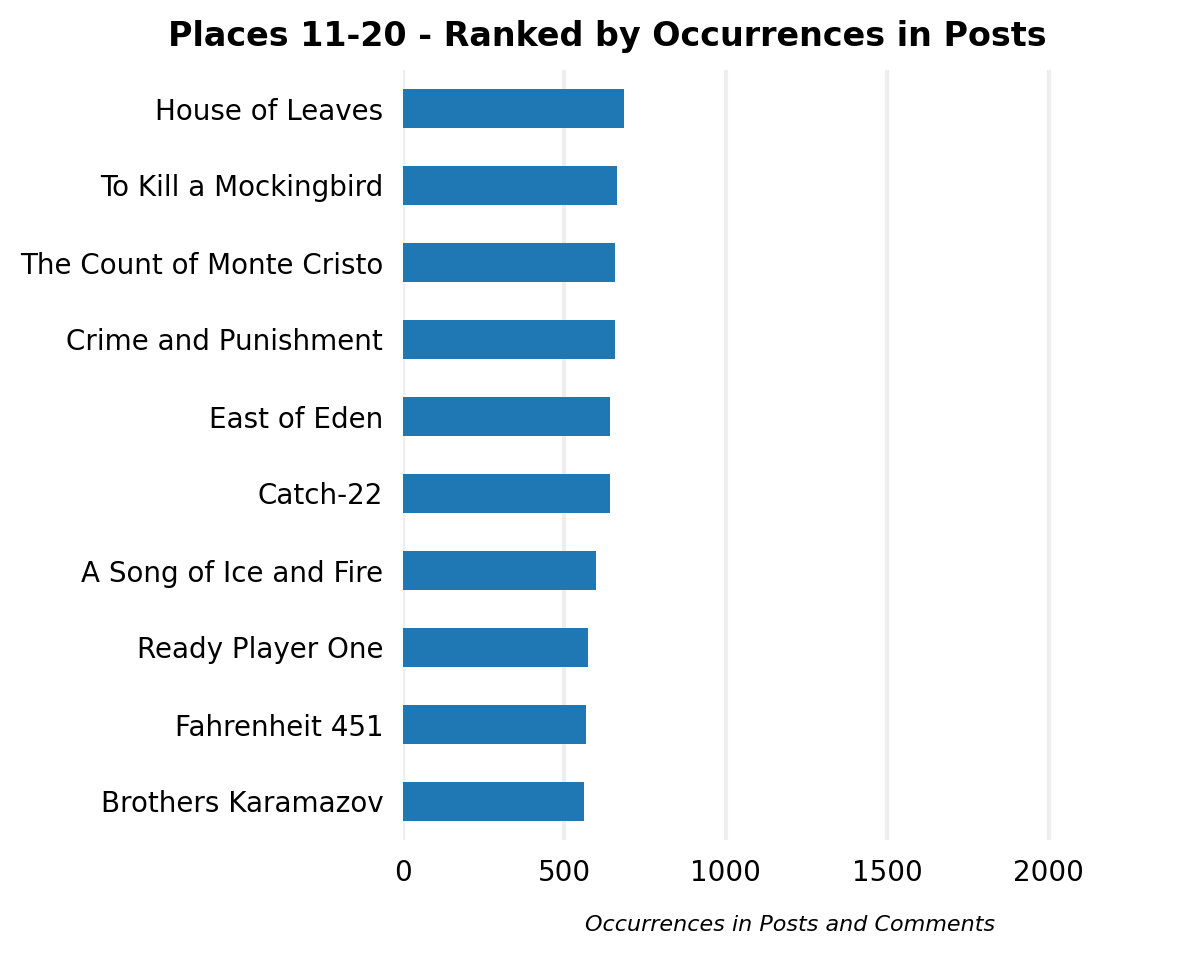

In [88]:
plot_ranking(post_rank[10:20], 'Places 11-20 - Ranked by Occurrences in Posts')

## Rank by Comments Texts

In [89]:
comment_rank = pd.DataFrame(book_ranking[book_ranking['Post or Comment'] == 'comment'].groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)
comment_rank = pd.DataFrame(comment_rank[['Occurrences']].reset_index())
comment_rank

C:\Users\timwi\AppData\Local\Temp\ipykernel_14628\1945169134.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  comment_rank = pd.DataFrame(book_ranking[book_ranking['Post or Comment'] == 'comment'].groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)


,Title,Normalized Title,Occurrences
0,Dune,dune,199
1,1984,1984,148
2,A Little Life,littlelife,85
3,The Hobbit,hobbit,85
4,Crime and Punishment,crimeandpunishment,83
...,...,...,...
6458,Starfish,starfish,1
6459,Stargate,stargate,1
6460,Starry night,starrynight,1
6461,Galapagos,galapagos,1


In [90]:
comment_rank = remove_synonyms(comment_rank)

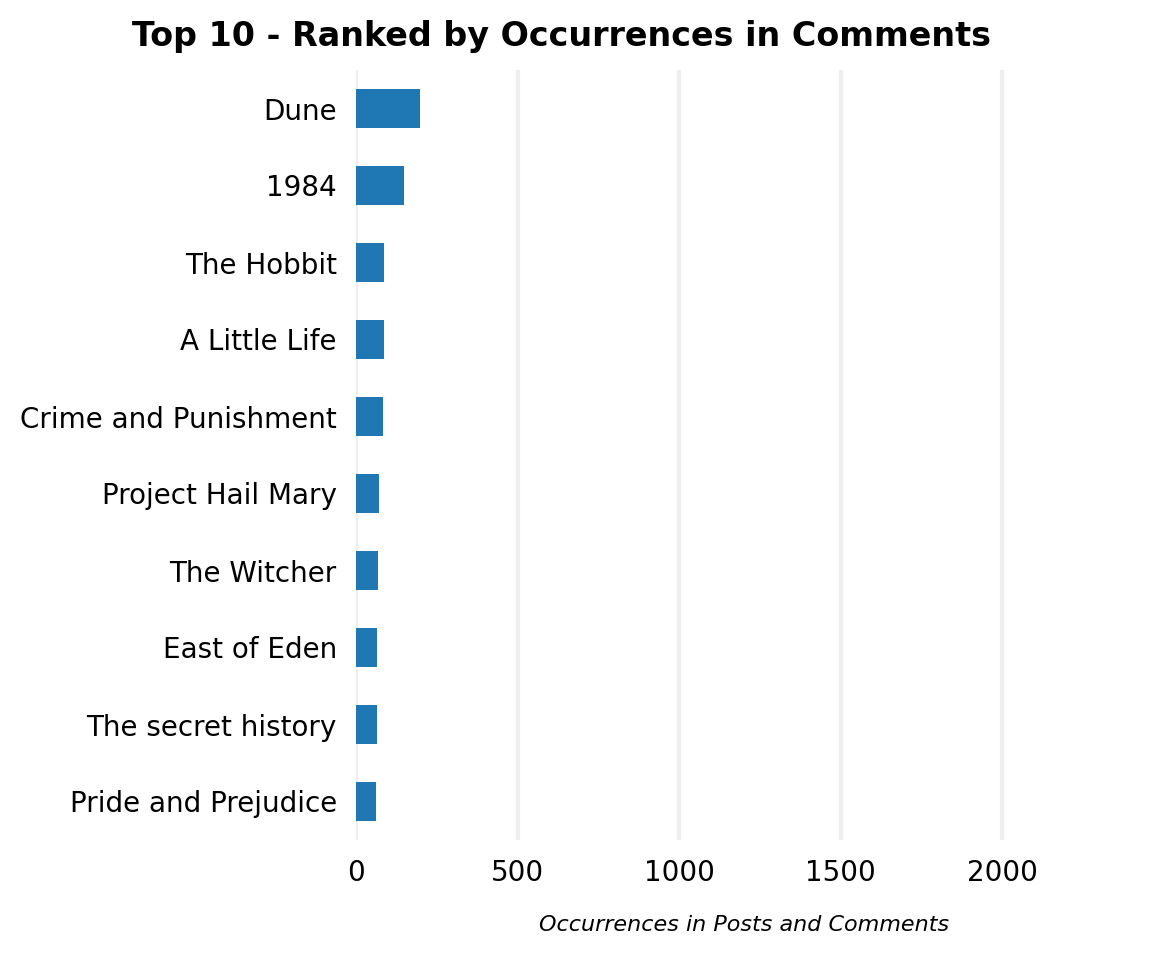

In [91]:
plot_ranking(comment_rank[:10], 'Top 10 - Ranked by Occurrences in Comments')

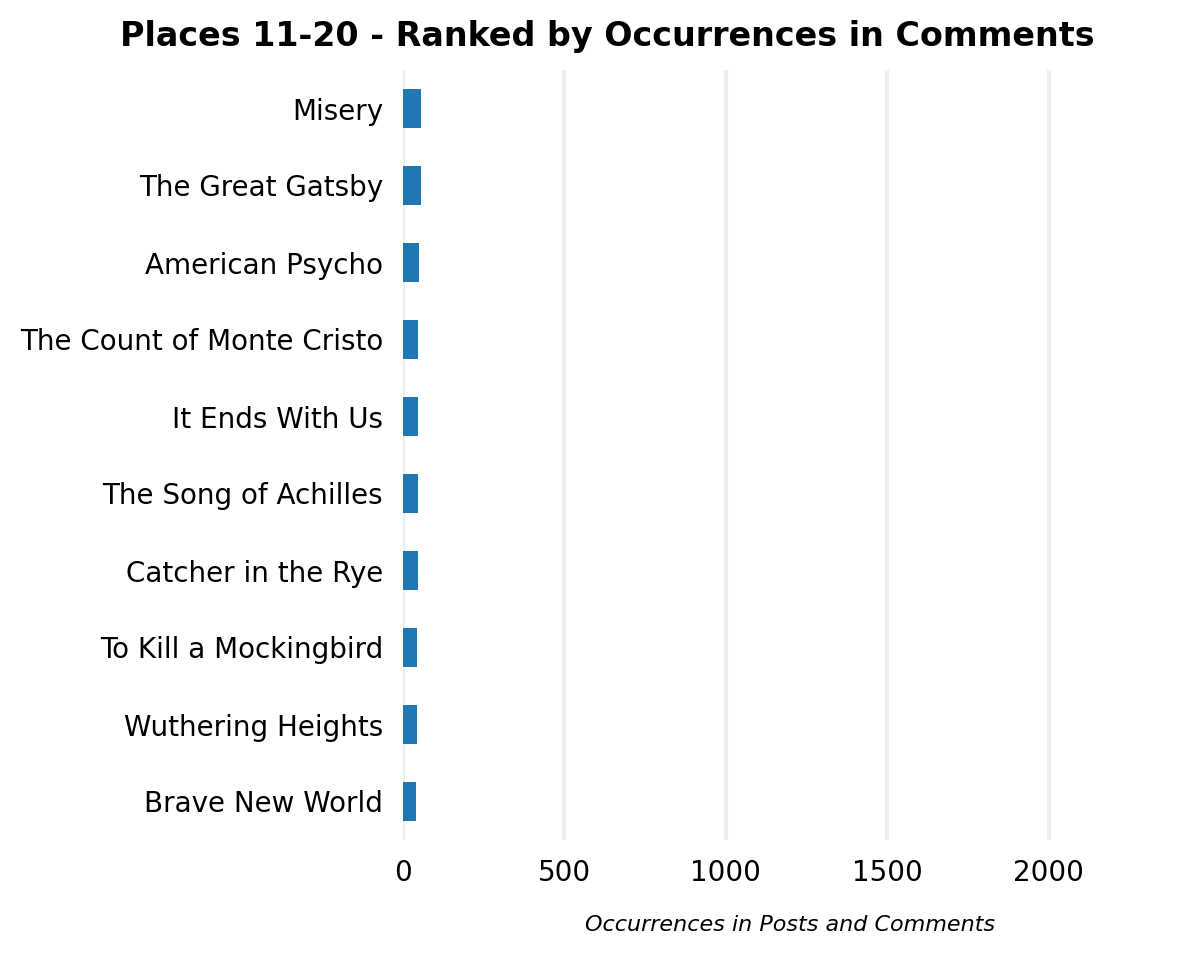

In [92]:
plot_ranking(comment_rank[10:20], 'Places 11-20 - Ranked by Occurrences in Comments')

## Top 100


In [93]:
post_and_comments_ranked.index += 1
top_100 = post_and_comments_ranked[:100][['Title', 'Occurrences']]
top_100

,Title,Occurrences
1,Dune,2303
2,1984,2228
3,The Hunger Games,1173
4,The dark tower,1064
5,Infinite jest,1045
...,...,...
96,The haunting of Hill House,186
97,For Whom the Bell Tolls,186
98,Finnegans wake,186
99,The Pillars of the Earth,184


In [94]:
# Create Markdown Table
print(top_100.to_markdown())

|     | Title                                |   Occurrences |
|----:|:-------------------------------------|--------------:|
|   1 | Dune                                 |          2303 |
|   2 | 1984                                 |          2228 |
|   3 | The Hunger Games                     |          1173 |
|   4 | The dark tower                       |          1064 |
|   5 | Infinite jest                        |          1045 |
|   6 | The Hobbit                           |           992 |
|   7 | Catcher in the Rye                   |           882 |
|   8 | Brave New World                      |           864 |
|   9 | Ender's Game                         |           787 |
|  10 | The Great Gatsby                     |           777 |
|  11 | Crime and Punishment                 |           741 |
|  12 | House of Leaves                      |           719 |
|  13 | East of Eden                         |           708 |
|  14 | To Kill a Mockingbird                |         

In [95]:
import re

readme = Path('README.md')
new_readme_str = re.sub(r'(?s)(?<=/summary>).*(?=</details>)', f'\n\n{top_100.to_markdown()}\n\n', readme.read_text(encoding='utf-8'))

readme.write_text(new_readme_str, encoding='utf-8')

8271